In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

In [2]:
# Define column names based on the table header
columns = [
    "rho", "temp", "press", "ad_grad", "s", "u", "c", "mmw", "x_ion", "x_d", "phase"
]

# Specify column data types
dtype_mapping = {
    "rho": float, "temp": float, "press": float, "ad_grad": float,
    "s": float, "u": float, "c": float, "mmw": float, "x_ion": float, "x_d": float, "phase": int
}

# Read the data, skipping metadata and header lines
file_path_rhot = "../Tables/aqua_eos_rhot_v1_0.dat"
df_rhot = pd.read_csv(file_path_rhot, sep='\s+', names=columns, skiprows=22, engine='python', dtype=dtype_mapping)

In [3]:
# Define column names based on the table header
columns = [
    "press", "temp", "rho", "ad_grad", "s", "u", "c", "mmw", "x_ion", "x_d", "phase"
]

# Specify column data types
dtype_mapping = {
    "press": float, "temp": float, "rho": float, "ad_grad": float,
    "s": float, "u": float, "c": float, "mmw": float, "x_ion": float, "x_d": float, "phase": int
}

# Read the data, skipping metadata and header lines
file_path_pt = "../Tables/aqua_eos_pt_v1_0.dat"
df_pt = pd.read_csv(file_path_pt, sep='\s+', names=columns, skiprows=22, engine='python', dtype=dtype_mapping)

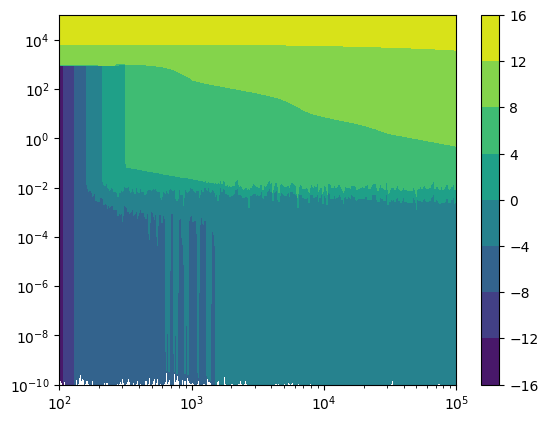

In [4]:
plt.tricontourf(df_rhot['temp'], df_rhot['rho'], np.log10(df_rhot['press']))
plt.colorbar()
plt.xscale('log')
plt.yscale('log')
plt.show()

In [5]:
# supercritical and superionic : phase == 5

super_mask_rhot = df_rhot['phase'] == 5
super_mask_pt = df_pt['phase'] == 5

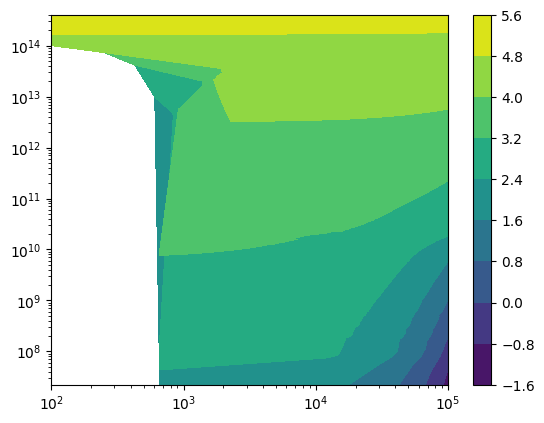

In [6]:
plt.tricontourf(df_pt['temp'][super_mask_pt], df_pt['press'][super_mask_pt], np.log10(df_pt['rho'][super_mask_pt]))
plt.colorbar()
plt.xscale('log')
plt.yscale('log')
plt.show()

In [7]:
# Read and store the original header (first 13 lines)
with open(file_path_rhot, "r") as f:
    header_lines = [next(f) for _ in range(21)]

# Define the format string for data columns
format_str = "{:14.8E} {:14.8E} {:14.8E} {:14.8E} {:14.8E} {:14.8E} {:14.8E} {:14.8E} {:14.8E} {:14.8E} {:.0f}\n"

output_file = "../Tables/aqua_eos_rhot_v1_0_modified.dat"

# Write the header and modified DataFrame to a new file
with open(output_file, "w") as f:
    f.writelines(header_lines)  # Write the original header
    for _, row in df_rhot.iterrows():
        f.write(format_str.format(*row))

print(f"Modified data saved to {output_file} with the original header.")

Modified data saved to ../Tables/aqua_eos_rhot_v1_0_modified.dat with the original header.


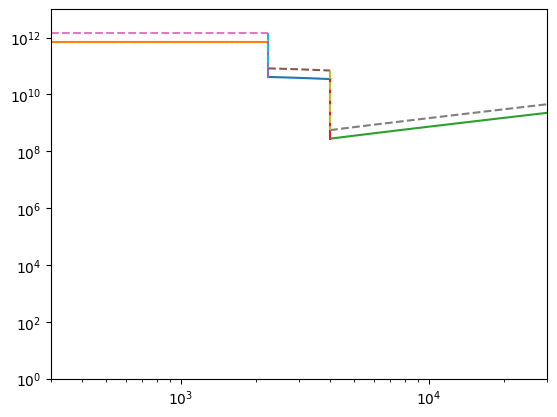

In [23]:
T_boundary_3_7 = np.linspace(300, 2250)
P_boundary_3_7 = 700e9 * np.ones_like(T_boundary_3_7)

T_boundary_5_7 = np.linspace(2250, 4000)
P_boundary_5_7 = 10 ** (np.log10(42e9) - np.log10(6) * (((T_boundary_5_7 / 1000) - 2) / 18))

T_boundary_6_7 = np.linspace(4000, 30000)
P_boundary_6_7 = 0.05e9 + (3e9 - 0.05e9) * (((T_boundary_6_7 / 1000) - 1) / 39)

P_boundary_5_7_isothermal = np.linspace(P_boundary_5_7[-1], P_boundary_6_7[0])
T_boundary_5_7_isothermal = 4000 * np.ones_like(P_boundary_5_7_isothermal)

P_boundary_3_7_isothermal = np.linspace(P_boundary_3_7[-1], P_boundary_5_7[0])
T_boundary_3_7_isothermal = 2250 * np.ones_like(P_boundary_5_7_isothermal)

plt.plot(T_boundary_5_7, P_boundary_5_7)
plt.plot(T_boundary_3_7, P_boundary_3_7)
plt.plot(T_boundary_6_7, P_boundary_6_7)
plt.plot(T_boundary_5_7_isothermal, P_boundary_5_7_isothermal)
plt.plot(T_boundary_3_7_isothermal, P_boundary_3_7_isothermal)

k = 2

plt.plot(T_boundary_5_7, k * P_boundary_5_7, linestyle='--')
plt.plot(T_boundary_3_7, k * P_boundary_3_7, linestyle='--')
plt.plot(T_boundary_6_7, k * P_boundary_6_7, linestyle='--')
plt.plot(T_boundary_5_7_isothermal, k * P_boundary_5_7_isothermal, linestyle='--')
plt.plot(T_boundary_3_7_isothermal, k * P_boundary_3_7_isothermal, linestyle='--')

plt.xlim([300, 30000])
plt.ylim([1, 1e13])
plt.xscale('log')
plt.yscale('log')
plt.show()

In [ ]:

def is_in_region(P, T):
    # Define boundaries
    T_boundary_3_7 = np.linspace(300, 2250)
    P_boundary_3_7 = 700e9 * np.ones_like(T_boundary_3_7)
    
    T_boundary_5_7 = np.linspace(2250, 4000)
    P_boundary_5_7 = 10 ** (np.log10(42e9) - np.log10(6) * (((T_boundary_5_7 / 1000) - 2) / 18))
    
    T_boundary_6_7 = np.linspace(4000, 30000)
    P_boundary_6_7 = 0.05e9 + (3e9 - 0.05e9) * (((T_boundary_6_7 / 1000) - 1) / 39)
    
    P_boundary_5_7_isothermal = np.linspace(P_boundary_5_7[-1], P_boundary_6_7[0])
    T_boundary_5_7_isothermal = 4000 * np.ones_like(P_boundary_5_7_isothermal)
    
    P_boundary_3_7_isothermal = np.linspace(P_boundary_3_7[-1], P_boundary_5_7[0])
    T_boundary_3_7_isothermal = 2250 * np.ones_like(P_boundary_5_7_isothermal)
    
    # Concatenate all boundary points
    T_boundaries = np.concatenate([T_boundary_3_7, T_boundary_3_7_isothermal, 
                                   T_boundary_5_7, T_boundary_5_7_isothermal, T_boundary_6_7])
    P_boundaries = np.concatenate([P_boundary_3_7, P_boundary_3_7_isothermal, 
                                   P_boundary_5_7, P_boundary_5_7_isothermal, P_boundary_6_7])
    
    P_inner_boundaries = P_boundaries * 2
    
    # Sort boundary points in ascending order of T
    sorted_indices = np.argsort(T_boundaries)
    T_boundaries = T_boundaries[sorted_indices]
    P_boundaries = P_boundaries[sorted_indices]
    P_inner_boundaries = P_inner_boundaries[sorted_indices]
    
    # Interpolate boundary curve
    P_interp = interp1d(T_boundaries, P_boundaries, bounds_error=False, fill_value=(P_boundaries[0], P_boundaries[-1]))
    P_inner_interp = interp1d(T_boundaries, P_inner_boundaries, bounds_error=False, fill_value=(P_boundaries[0], P_boundaries[-1]))
    
    # Check if (T, P) is inside the region
    return P <= P_interp(T), P <= P_inner_interp(T)

In [29]:
filename = '../SESAME_table/AQUA_H20.txt'

In [39]:
with open(filename, 'r') as f:
    lines = f.readlines()

# Extract metadata
metadata = []
for line in lines:
    if line.startswith('#') or line.strip() == '':
        metadata.append(line)
    else:
        break

# Extract numerical data
data_start_idx = len(metadata) + 1
date = int(lines[data_start_idx - 1])
print(date)
num_values = [int(v) for v in lines[data_start_idx].split()]
print(num_values)
num_rho, num_T = num_values[0], num_values[1]

rho = np.array([float(v) for v in lines[data_start_idx + 1].split()])
T = np.array([float(v) for v in lines[data_start_idx + 2].split()])

table = np.loadtxt(lines[data_start_idx + 3:], dtype=np.float64)
u, P, c, s = table[:, 0], table[:, 1], table[:, 2], table[:, 3]

u = u.reshape(num_rho, num_T)
P = P.reshape(num_rho, num_T)
c = c.reshape(num_rho, num_T)
s = s.reshape(num_rho, num_T)

20220714
[1501, 301]


In [40]:
modified_file = '../SESAME_table/AQUA_H20_v2.txt'

In [41]:
with open(modified_file, 'w') as f:
    f.writelines(metadata)
    f.write(f'{date}\n')
    f.write(f"{num_rho} {num_T}\n")
    f.write(" ".join(f"{v:.8e}" for v in rho) + "\n")
    f.write(" ".join(f"{v:.8e}" for v in T) + "\n")
    
    for i in range(num_rho):
        for j in range(num_T):
            f.write(f"{u[i, j]:.8e} {P[i, j]:.8e} {c[i, j]:.8e} {s[i, j]:.8e}\n")